In [1]:
#Voice Separation, using machine learning

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
from IPython.display import Audio
from sklearn.decomposition import PCA


path = '/Users/elibay/Desktop/test.wav'


In [ ]:
def pca_reduce(signal, n_components, block_size=1024):
    
    # First, zero-pad the signal so that it is divisible by the block_size
    samples = len(signal)
    hanging = block_size - np.mod(samples, block_size)
    padded = np.lib.pad(signal, (0, hanging), 'constant', constant_values=0)
    
    # Reshape the signal to have 1024 dimensions
    reshaped = padded.reshape((len(padded) // block_size, block_size))
    
    # Second, do the actual PCA process
    pca = PCA(n_components=n_components)
    pca.fit(reshaped)
    
    transformed = pca.transform(reshaped)
    reconstructed = pca.inverse_transform(transformed).reshape((len(padded)))
    return pca, transformed, reconstructed

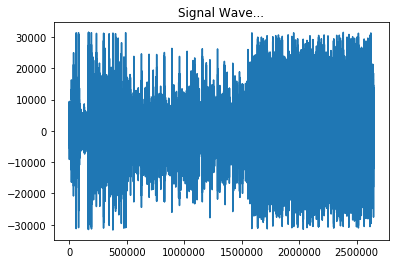

In [2]:
sample_rate, samples = wavfile.read(path)
samples = samples.sum(axis=1) / 2
samples = samples[:sample_rate * 60]
plt.figure(1)
plt.title('Signal Wave...')
plt.plot(samples)
plt.show()

In [3]:
Audio(data=samples, rate=sample_rate)

In [4]:
_, _, reconstructed = pca_reduce(samples, 1024, 1024)

Audio(data=reconstructed, rate=sample_rate)

NameError: name 'pca_reduce' is not defined